In [89]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from dateutil.relativedelta import relativedelta

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import ttest_ind
from datetime import datetime as dt

In [90]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')


In [91]:
station_df=pd.read_csv('Resources/hawaii_stations.csv')


In [92]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')


In [93]:
df.dtypes


station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object

In [94]:
#Set the date column as the DataFrame index
df.set_index('date').head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


In [95]:
df.count()

station    19550
date       19550
prcp       18103
tobs       19550
dtype: int64

In [96]:
#Drop the date column
drop_df=df.drop(['date'], axis=1)
drop_df.head()

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73


In [97]:
#Compare June and December data across all years

In [98]:
from scipy import stats

In [99]:
Filter_data = df[(df['date'].dt.month == 6) | (df['date'].dt.month == 12)]
Filter_data.head()

,station,date,prcp,tobs
133,USC00519397,2010-06-01,0.00,78
134,USC00519397,2010-06-02,0.01,76
135,USC00519397,2010-06-03,0.00,78
136,USC00519397,2010-06-04,0.00,76
137,USC00519397,2010-06-05,0.00,77


In [100]:
# Identify the average temperature for June
Avg_June_temperature = Filter_data[Filter_data['date'].dt.month==6]


In [62]:
Avg_June_temperature['tobs'].mean()

74.94411764705882

In [63]:
# Identify the average temperature for December
Avg_Dec_temperature = Filter_data[Filter_data['date'].dt.month==12]
Avg_Dec_temperature['tobs'].mean()

71.04152933421226

In [164]:
# Create collections of temperature data
#Use the t-test to determine whether the difference in the means, if any, is statistically significant.
#Will you use a paired t-test, or an unpaired t-test? Why?

scipy.stats.ttest_ind(Avg_June_temperature['tobs'], Avg_Dec_temperature['tobs'], equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

In [65]:
#The p value is <<0.01 showing us that there is a significant diference between two groups of temperatures
#where June is Hotter than December


In [66]:
################################### TEMPERATURE ANALYSIS II #####################################################     

In [67]:
#################################################################################################################

In [68]:
#You are looking to take a trip from August first to August seventh of this year, 
#but are worried that the weather will be less than ideal. Using historical data in the dataset find out
#what the temperature has previously looked like.

Trip_data = df[df['date'].dt.month == 8]
Trip_data.head()

,station,date,prcp,tobs
190,USC00519397,2010-08-01,0.04,77
191,USC00519397,2010-08-02,0.01,76
192,USC00519397,2010-08-03,0.02,77
193,USC00519397,2010-08-04,0.07,77
194,USC00519397,2010-08-05,0.08,75


In [69]:
data_path="Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{data_path}", echo=False) 
#REFLECT AND QUERY DATES
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement=Base.classes.measurement
Station=Base.classes.station

In [70]:
session=Session(engine)

In [71]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
# and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    c_results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                    filter(Measurement.date >= start_date).\
                    filter(Measurement.date <= end_date).all()
    return c_results
calc_temps('2010-08-01', '2017-08-01')

[(53.0, 73.19013848559302, 87.0)]

In [72]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_results = calc_temps('2017-08-01', '2017-08-07')
trip_results

[(72.0, 79.25, 83.0)]

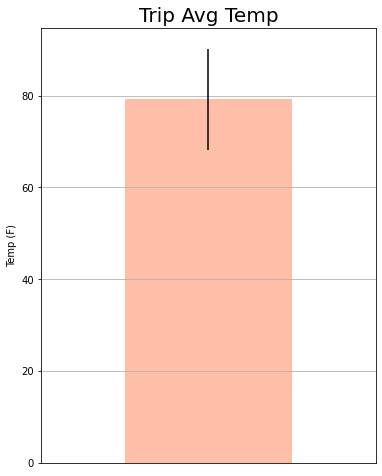

In [73]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip_results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig("Images/TripTempSummary.png")
plt.show()

In [74]:
session.close()

In [113]:
#Calculate the rainfall per weather station using the previous year's matching dates.
#Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation.



In [114]:
rain_df = df[(df['date'].dt.month == 8) & ((df['date'].dt.day >= 1) & (df['date'].dt.day <= 7))  ]
rain_df.head()

,station,date,prcp,tobs
190,USC00519397,2010-08-01,0.04,77
191,USC00519397,2010-08-02,0.01,76
192,USC00519397,2010-08-03,0.02,77
193,USC00519397,2010-08-04,0.07,77
194,USC00519397,2010-08-05,0.08,75


In [129]:
rain_station=pd.merge(rain_df, station_df, how="outer")
rain_station.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-08-01,0.04,77,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-08-02,0.01,76,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-08-03,0.02,77,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-08-04,0.07,77,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-08-05,0.08,75,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [128]:
rain_station_df = rain_station.groupby('station').sum()


rain_station_df.sort_values(by='prcp', ascending=False)

,prcp,tobs,latitude,longitude,elevation
station,,,,,
USC00516128,17.48,3890,1130.65430,-8363.53250,8077.2
USC00519281,9.41,3907,1115.48684,-8208.14228,1710.8
USC00513117,5.61,3710,1049.74660,-7732.27350,715.4
USC00519523,3.32,4232,1152.12024,-8516.41506,1053.0
USC00514830,2.55,2390,667.16030,-4892.95940,217.0
USC00519397,1.36,4395,1191.20960,-8837.74080,168.0
USC00517948,1.13,1850,513.44160,-3791.40240,285.6
USC00518838,1.00,915,257.99040,-1896.13320,3679.2
USC00511918,0.22,2938,831.29280,-6161.96880,35.1


In [154]:
#Daily Temperature Normals

def daily_normals(date):
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [160]:
# Set the start and end date of the trip
start_date = '2017-08-01'
end_date ='2017-08-07'
# Create a list of dates for your trip in the format %m-%d.
dates = session.query(Measurement.date).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()

trip_dates = [x[0] for x in dates]
trip_dates_stripped= [x[5:] for x in trip_dates]

# Find the start month/day and the end month/day 
start_month_day = trip_dates_stripped[0]
end_month_day = trip_dates_stripped[-1]

# Loop through the list of %m-%d strings and calculate the normals for each date    
daily_normals = [session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),
                func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).\
                filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
daily_normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [161]:
# Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
# Create a dataframe from the previous query 
temp_df= pd.DataFrame(daily_normals,columns=['min_temp', 'avg_temp', 'max_temp'])

# Add trip_dates to Pandas DataFrame
temp_df['date']= trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
temp_df['date'] = pd.to_datetime(temp_df['date'], format='%Y-%m-%d')

# Set index to date
temp_df.set_index('date',inplace=True)

temp_df

,min_temp,avg_temp,max_temp
date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


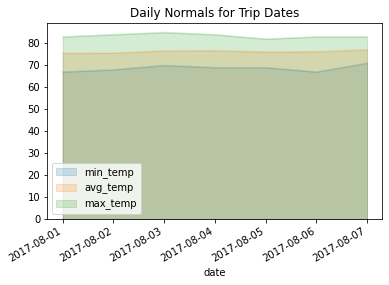

In [162]:
# Plot the daily normals as an area plot with `stacked=False`
temp_df.plot(kind='area', alpha=0.2, stacked=False, x_compat=True, title="Daily Normals for Trip Dates")
plt.savefig("Images/DailyNormals.png")
plt.show()